<a href="https://colab.research.google.com/github/YoochanMyung/lecture_notes/blob/master/CNN_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README
- This tutorial is based on the "Basic image classification" guide on Tensorflow (https://www.tensorflow.org/tutorials/keras/classification)
- 

Preparation

1.  Import libraries
 * Define several functions
2.  Data Collection and Preparation
 *   Download an example dataset (MNIST FASHION)
 *   Split the dataset into Training, Validation and Test (): `"Separate Training into training and validation datsets."`
 *   Visualisation of datasets
     *    Data distribution: `"Are they evenlly distributed?"`
     *    Input images: `"How the input images look like?"`


Building Neural Network Models

1. Model 1: MLP, 1 Hidden Layer
 * Check loss/accuracy over epoch
 * Check the performance of model 1

2. Model 2: CNN, X Hidden Layers
 * Check loss/accuracy over epoch
 * Check the performance of model 2


# Preparation

## Import Libraries 
1. Tensorflow : a deep learning library
2. Numpy : a math library
3. Matplotlib: a plottling library
4. Seaborn : a data visualisation library based on Matplotlib
5. Plotly : a data visualisation App

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split # for data preparation
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D # for CNN

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
# Define several functions
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename='accuracy-loss')

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')    

## Data Collection and Preparation

### Download an example dataset, Fashion MNIST

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


### Split Training Data into Training and Validation datasets
Since the dataset provides only training and test datasets, we are going to split the `60,000 training data` into `48,000 training  and 12,000 validation` in the ratio of 7:3.

Dataset has the following labels:
```
Label:	Class  
0:	T-shirt/top  
1:	Trouser  
2:	Pullover  
3:	Dress  
4:	Coat  
5:	Sandal  
6:	Shirt  
7:	Sneaker  
8:	Bag  
9:	Ankle boot  
```

In [4]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.3, random_state=1) # without the random_state, this method returns different outputs at every run.

In [5]:
class_names = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',\
               7:'Sneaker',8:'Bag',9:'Ankle boot'}
               
# Checking the dimension of training, validation and test datasets
print("Training data : {}".format(X_train.shape, y_train.shape)) # 42,000 images of 28 x 28 pixels
print("Validation data : {}".format(X_val.shape, y_val.shape)) # 18,000 images of 28 x 28 pixels
print("Test data : {}".format(X_test.shape, y_test.shape)) # 10,000 images of 28 x 28 pixels
print("Unique Labels: {}".format(np.unique(y_train)))
print("{}".format(class_names.values()))

Training data : (42000, 28, 28)
Validation data : (18000, 28, 28)
Test data : (10000, 28, 28)
Unique Labels: [0 1 2 3 4 5 6 7 8 9]
dict_values(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])


### Visualisation of dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



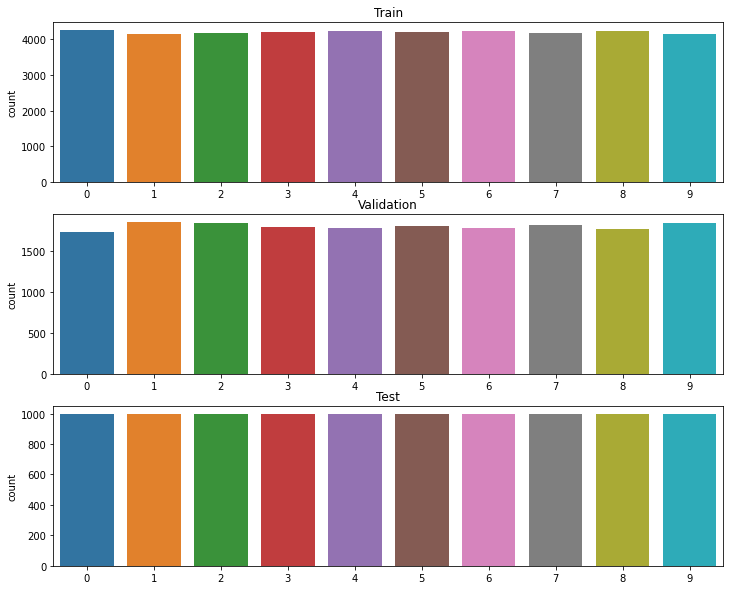

In [6]:
# Data visualisation, it allows you to browse the distribution of classes across training, valdiation and test datasets
f, ax = plt.subplots(3,1, figsize=(12,10))
sns.countplot(y_train,ax=ax[0])
sns.countplot(y_val,ax=ax[1])
sns.countplot(y_test,ax=ax[2])
ax[0].set_title('Train')
ax[1].set_title('Validation')
ax[2].set_title('Test')
plt.show()

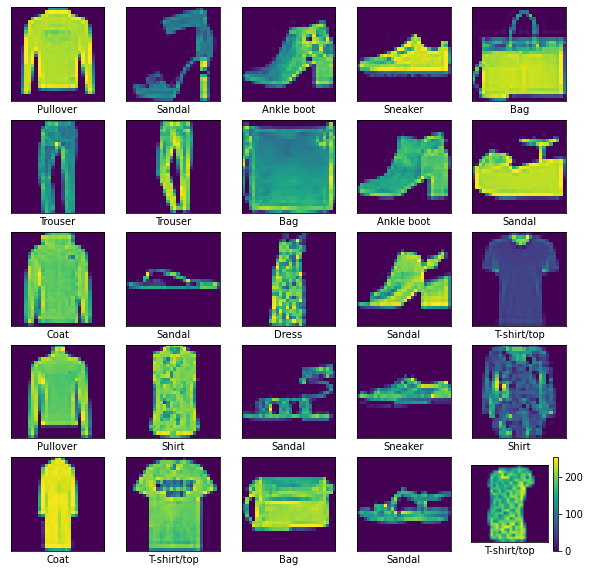

In [7]:
# Image visualisation
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.colorbar()
plt.show()

#Neural Network model Building 

## Model 1
- Tensorflow example (https://www.tensorflow.org/tutorials/keras/classification), simplest, no convolution layers

In [8]:
# How do you draw your neural network architecture?
model_1 = tf.keras.Sequential() # just like a shopping cart, you can put layers in here

model_1.add(tf.keras.layers.Flatten(input_shape=(28,28))) # make 1D data from 2D image
model_1.add(tf.keras.layers.Dense(128, activation='relu')) # Hidden Layer with 128 neurons that have 'ReLU' as activation function
model_1.add(tf.keras.layers.Dense(10, activation='softmax')) # Output Layer with 10 output nodes (for 10 output classes) with 'SoftMax' activation function


# How to optimize your model?
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training without Early Stopping
# train_model_1 = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size= 128) 

# Training with Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
train_model_1 = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size= 128,
                            callbacks=[callback])


test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:',test_acc)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



329/329 [==============================] - 5s 11ms/step - loss: 9.6201 - accuracy: 0.7218 - val_loss: 2.0021 - val_accuracy: 0.7213
Epoch 2/100
329/329 [==============================] - 3s 10ms/step - loss: 1.1897 - accuracy: 0.7207 - val_loss: 0.9639 - val_accuracy: 0.7521
Epoch 3/100
329/329 [==============================] - 3s 9ms/step - loss: 0.7735 - accuracy: 0.7635 - val_loss: 0.7788 - val_accuracy: 0.7635
Epoch 4/100
329/329 [==============================] - 3s 10ms/step - loss: 0.6545 - accuracy: 0.7751 - val_loss: 0.6739 - val_accuracy: 0.7761
Epoch 5/100
329/329 [==============================] - 3s 10ms/step - loss: 0.5759 - accuracy: 0.7908 - val_loss: 0.6323 - val_accuracy: 0.7825
Epoch 6/100
329/329 [==============================] - 3s 10ms/step - loss: 0.5311 - accuracy: 0.8013 - val_loss: 0.6022 - val_accuracy: 0.7976
Epoch 7/100
329/329 [==============================] - 3s 10ms/step - loss: 0.4966 - accuracy: 0.8146 - val_loss: 0.5686 - val_accuracy: 0.8114
Epoch

### Ploting the curves of accuracy and loss over the epoch 

In [9]:
plot_accuracy_and_loss(train_model_1)


/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Check the performance of the model 1

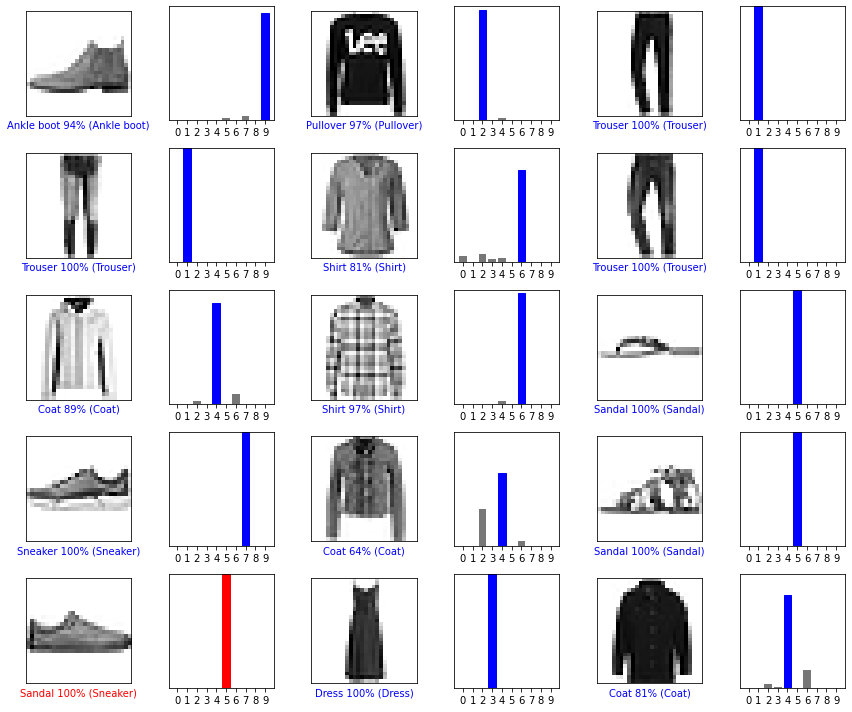

In [10]:
predictions_model_1 = model_1.predict(X_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_model_1[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_model_1[i], y_test)
plt.tight_layout()
plt.show()

## Model 2
- 3 Conv layers (32, 64 and 128 filters with ReLU)
- 2 MaxPooling layers
- Same dense layer as Model 1

In [11]:
model_2 = tf.keras.Sequential()
model_2.add(Conv2D(32, kernel_size=(3,3),
                   activation='relu',
                   input_shape=(28,28,1)))
model_2.add(MaxPooling2D(2,2))
model_2.add(Conv2D(64,
                   kernel_size=(3,3),
                   activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(128,(3, 3), activation='relu'))
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(128, activation='relu'))
model_2.add(tf.keras.layers.Dense(10, activation='softmax'))

model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# for 2D CNN, we need to have additional dimension, Epoch column
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_train_cnn = X_train_cnn.astype('float32')

# train_model_2 = model_2.fit(X_train_cnn, y_train, validation_data=(X_val, y_val), epochs=100, batch_size= 128)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
train_model_2 = model_2.fit(X_train_cnn, y_train, validation_data=(X_val, y_val), epochs=100, batch_size= 128,\
                            callbacks=[callback])

test_loss, test_acc = model_2.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:',test_acc)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



329/329 [==============================] - 43s 128ms/step - loss: 0.8796 - accuracy: 0.7842 - val_loss: 0.4173 - val_accuracy: 0.8456
Epoch 2/100
329/329 [==============================] - 44s 135ms/step - loss: 0.3659 - accuracy: 0.8665 - val_loss: 0.3583 - val_accuracy: 0.8694
Epoch 3/100
329/329 [==============================] - 41s 126ms/step - loss: 0.3083 - accuracy: 0.8861 - val_loss: 0.3182 - val_accuracy: 0.8825
Epoch 4/100
329/329 [==============================] - 41s 125ms/step - loss: 0.2745 - accuracy: 0.8975 - val_loss: 0.3106 - val_accuracy: 0.8859
Epoch 5/100
329/329 [==============================] - 42s 128ms/step - loss: 0.2496 - accuracy: 0.9070 - val_loss: 0.3242 - val_accuracy: 0.8859
Epoch 6/100
329/329 [==============================] - 41s 124ms/step - loss: 0.2221 - accuracy: 0.9169 - val_loss: 0.3123 - val_accuracy: 0.8904
Epoch 7/100
329/329 [==============================] - 41s 125ms/step - loss: 0.2078 - accuracy: 0.9226 - val_loss: 0.3283 - val_accurac

### Ploting the curves of accuracy and loss over the epoch 

In [12]:
plot_accuracy_and_loss(train_model_2)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Check the performance of the model 2

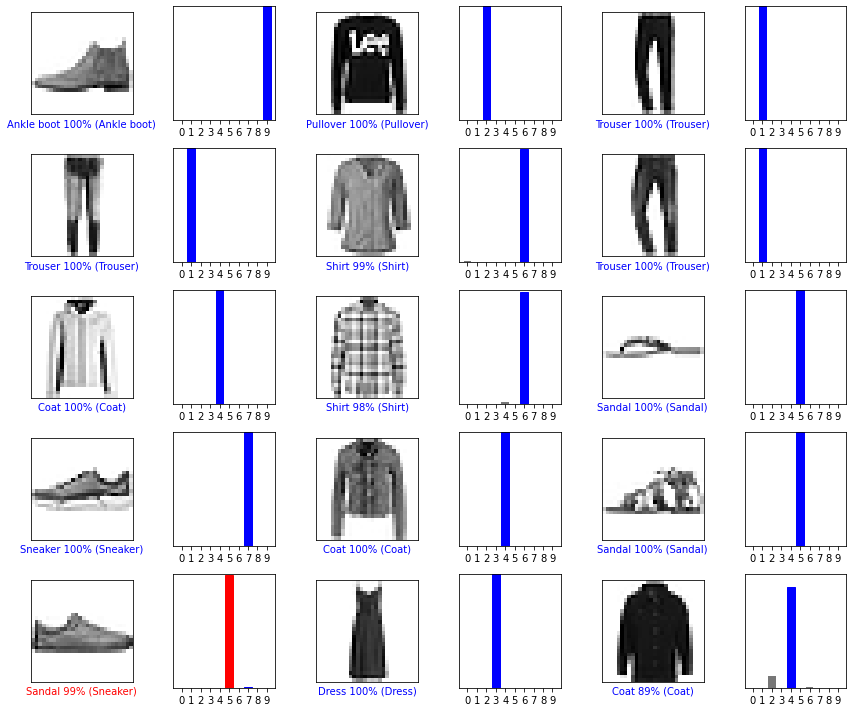

In [13]:
predictions_model_2 = model_2.predict(X_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_model_2[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_model_2[i], y_test)
plt.tight_layout()
plt.show()

## Model 3
- Normalised all data images by multipling 1/255.0
- 3 Conv layers (32, 64 and 128 filters with ReLU)
- 2 MaxPooling layers
- 4 DropOut layers(0.25, 0.25, 0.3, 0.3)
- Same dense layer as Model 1

In [14]:
model_3 = tf.keras.Sequential()
model_3.add(Conv2D(32, kernel_size=(3,3),
                   activation='relu',
                   input_shape=(28,28,1)))
model_3.add(MaxPooling2D(2,2))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(64,
                   kernel_size=(3,3),
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(128,(3, 3), activation='relu'))
model_3.add(Dropout(0.30))
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(128, activation='relu'))
model_3.add(Dropout(0.30))
model_3.add(tf.keras.layers.Dense(10, activation='softmax'))

model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# for 2D CNN, we need to have additional dimension, Epoch column
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_train_cnn = X_train_cnn.astype('float32')

# train_model_3 = model_3.fit(X_train_cnn, y_train, validation_data=(X_val, y_val), epochs=100, batch_size= 128)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
train_model_3 = model_3.fit(X_train_cnn/255.0, y_train, validation_data=(X_val/255.0, y_val), epochs=100, batch_size= 128,\
                            callbacks=[callback])

test_loss, test_acc = model_3.evaluate(X_test/255.0, y_test, verbose=2)
print('\nTest accuracy:',test_acc)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



329/329 [==============================] - 48s 143ms/step - loss: 0.7812 - accuracy: 0.7078 - val_loss: 0.4944 - val_accuracy: 0.8111
Epoch 2/100
329/329 [==============================] - 46s 139ms/step - loss: 0.5058 - accuracy: 0.8111 - val_loss: 0.4065 - val_accuracy: 0.8501
Epoch 3/100
329/329 [==============================] - 53s 161ms/step - loss: 0.4340 - accuracy: 0.8391 - val_loss: 0.3641 - val_accuracy: 0.8656
Epoch 4/100
329/329 [==============================] - 47s 142ms/step - loss: 0.3940 - accuracy: 0.8559 - val_loss: 0.3362 - val_accuracy: 0.8744
Epoch 5/100
329/329 [==============================] - 46s 139ms/step - loss: 0.3612 - accuracy: 0.8669 - val_loss: 0.3417 - val_accuracy: 0.8693
Epoch 6/100
329/329 [==============================] - 46s 139ms/step - loss: 0.3492 - accuracy: 0.8721 - val_loss: 0.2941 - val_accuracy: 0.8932
Epoch 7/100
329/329 [==============================] - 46s 141ms/step - loss: 0.3268 - accuracy: 0.8797 - val_loss: 0.3015 - val_accurac

### Ploting the curves of accuracy and loss over the epoch 

In [15]:
plot_accuracy_and_loss(train_model_3)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Check the performance of the model 3

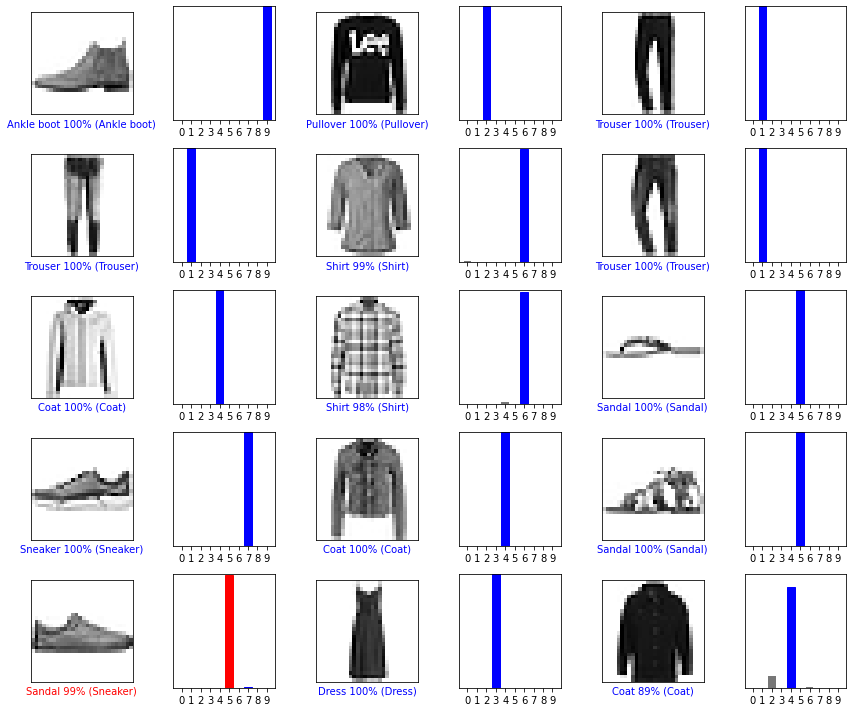

In [16]:
predictions_model_3 = model_3.predict(X_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_model_2[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_model_2[i], y_test)
plt.tight_layout()
plt.show()